# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
filepath = 'https://raw.githubusercontent.com/BrunoaChagas/ebac/main/Profissao-%20Cientista%20de%20Dados_M10_support%20material.csv'

df = pd.read_csv(filepath_or_buffer=filepath)

df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


---

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [17]:
df.drop(columns=['Unnamed: 0', 'index', 'mau'], inplace=True)

print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB
None 



In [18]:
print('Quantidade de linhas duplicadas:', df.duplicated().sum())

Quantidade de linhas duplicadas: 453


In [19]:
print('Quantidade total de linhas:', len(df), '\n')

print('Quantidade após remoção das linhas duplicadas:', 
      len(df.drop_duplicates()), '\n')

df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

Quantidade total de linhas: 15000 

Quantidade após remoção das linhas duplicadas: 14547 



,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14542,2016-03-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,30,9.800000,2.0,3018.59
14543,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14544,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14545,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


In [21]:
# Matriz de correlação

df.corr()

ValueError: could not convert string to float: '2015-01-01'

A partir da matriz de correlação, é possível observar que a variável que apresenta maior relação com `renda` é `tempo_emprego`, com um índice de correlação de 39%, enquanto as demais variáveis não ultrapassam 1%.

In [ ]:
# Matriz de dispersão

sns.pairplot(data=df, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'])

plt.show()

Ao analisar o *pairplot*, que consiste na matriz de dispersão, é possível identificar *outliers* na variável `renda` associados principalmente aos clientes com renda empresarial, os quais podem afetar o resultado da análise de tendência, apesar de ocorrerem com baixa frequência. Além disso, é observada uma baixa correlação entre praticamente todas as variáveis quantitativas, reforçando os resultados obtidos na matriz de correlação.

In [7]:
# Clustermap

cmap = sns.diverging_palette(h_neg=250, 
                             h_pos=359, 
                             as_cmap=True, 
                             sep=1, 
                             center = 'light')

sns.clustermap(data=df.corr(), 
               figsize=(10, 10), 
               center=0, 
               cmap=cmap)

plt.show()

ValueError: could not convert string to float: '2015-01-01'

Com o *clustermap*, é possível reforçar novamente os resultados de baixa correlação com a variável `renda`. Apenas a variável `tempo_emprego` apresenta um índice considerável para análise. Além disso, foram apresentadas duas variáveis booleanas, `posse_de_imovel` e `posse_de_veiculo`, mas que também possuem baixo índice de correlação com `renda`.

---

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

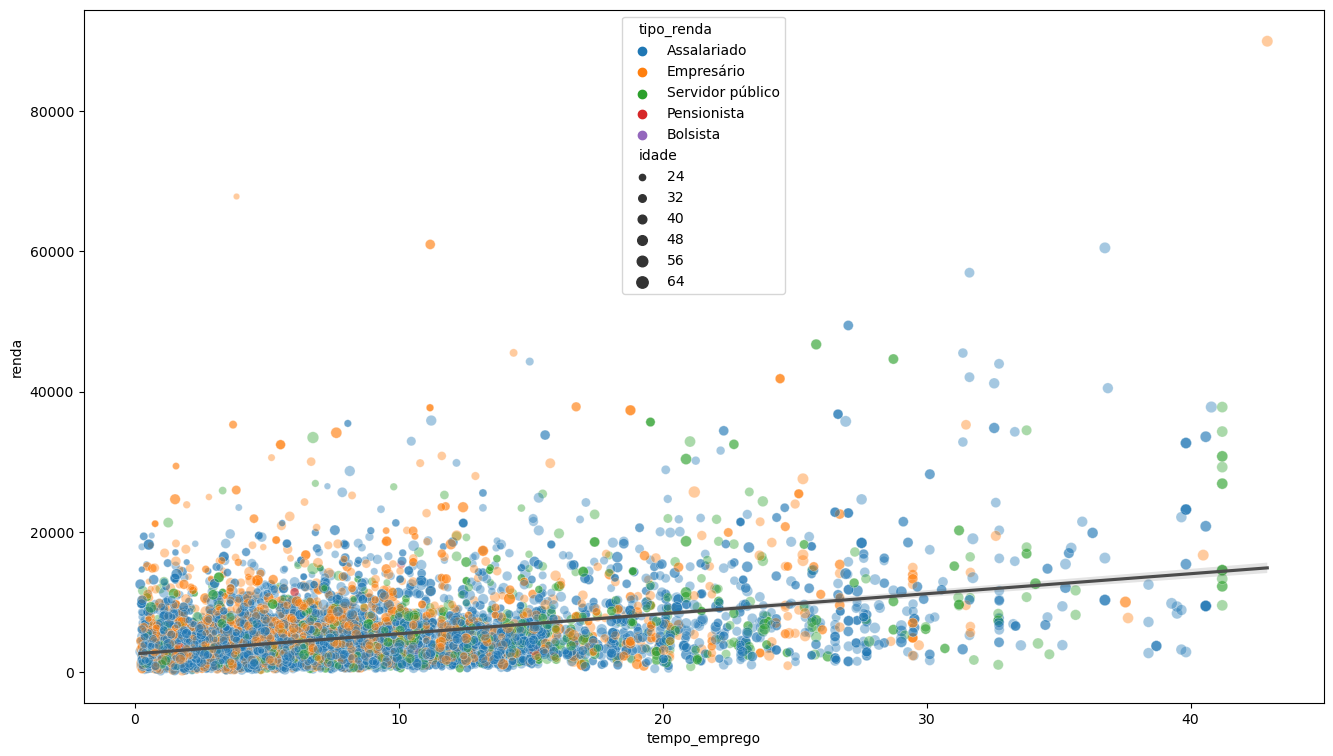

In [8]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='idade',  # <- 2ª
                data=df,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', y='renda', data=df, scatter=False, color='.3')

plt.show()

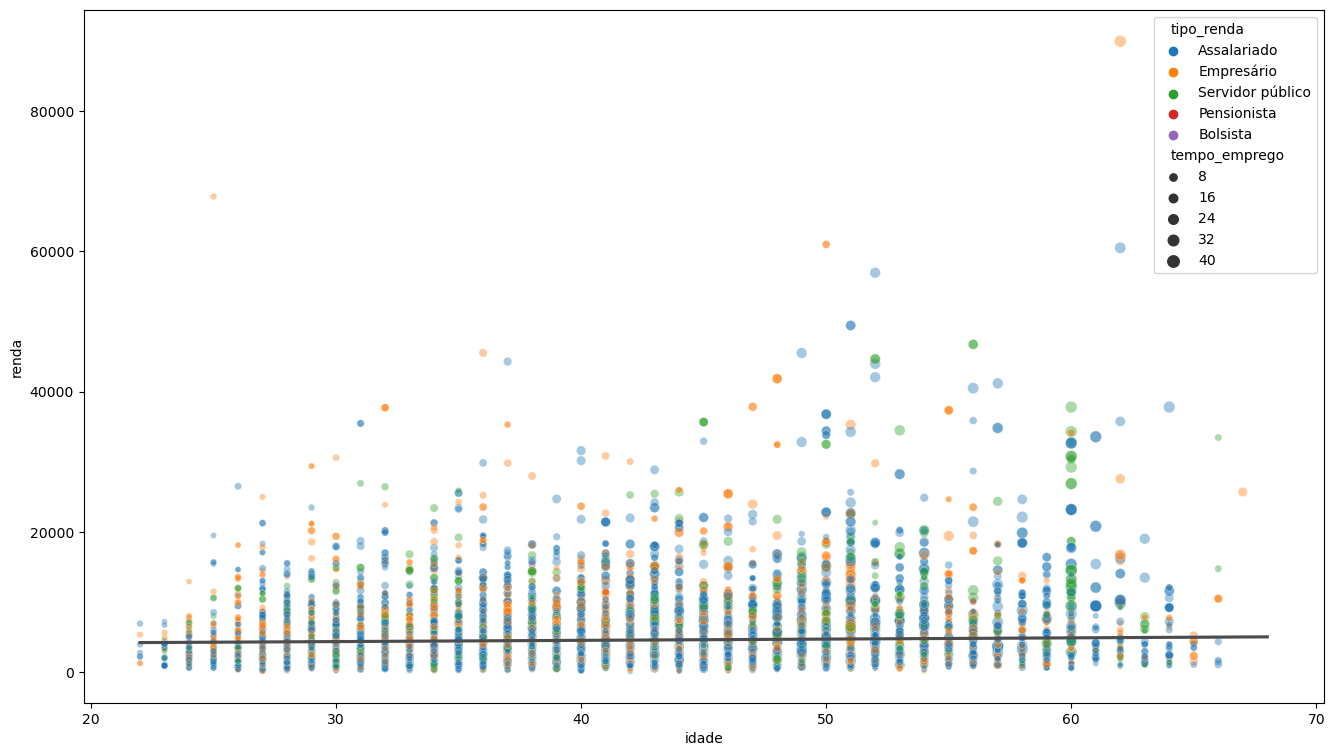

In [9]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='idade',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='tempo_emprego',  # <- 2ª
                data=df,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade', y='renda', data=df, scatter=False, color='.3')

plt.show()

Embora a correlação entre a variável `tempo_emprego` e a variável `renda` não seja tão alta, é possível identificar facilmente a covariância com a inclinação da linha de tendência. Por outro lado, a variável `idade`, que apresentou a segunda maior correlação, possui uma inclinação praticamente imperceptível.

---

3) Na sua opinião, há outliers na variável renda?

Sim. Como mencionado anteriormente, há a presença de outliers na variável `renda` de clientes com o tipo de renda empresarial, porém, devido à baixa incidência, é possível que esses outliers não afetem significativamente os resultados de tendência.

---

4) Calcule o logaritmo da variável renda e repita a sequência de análise

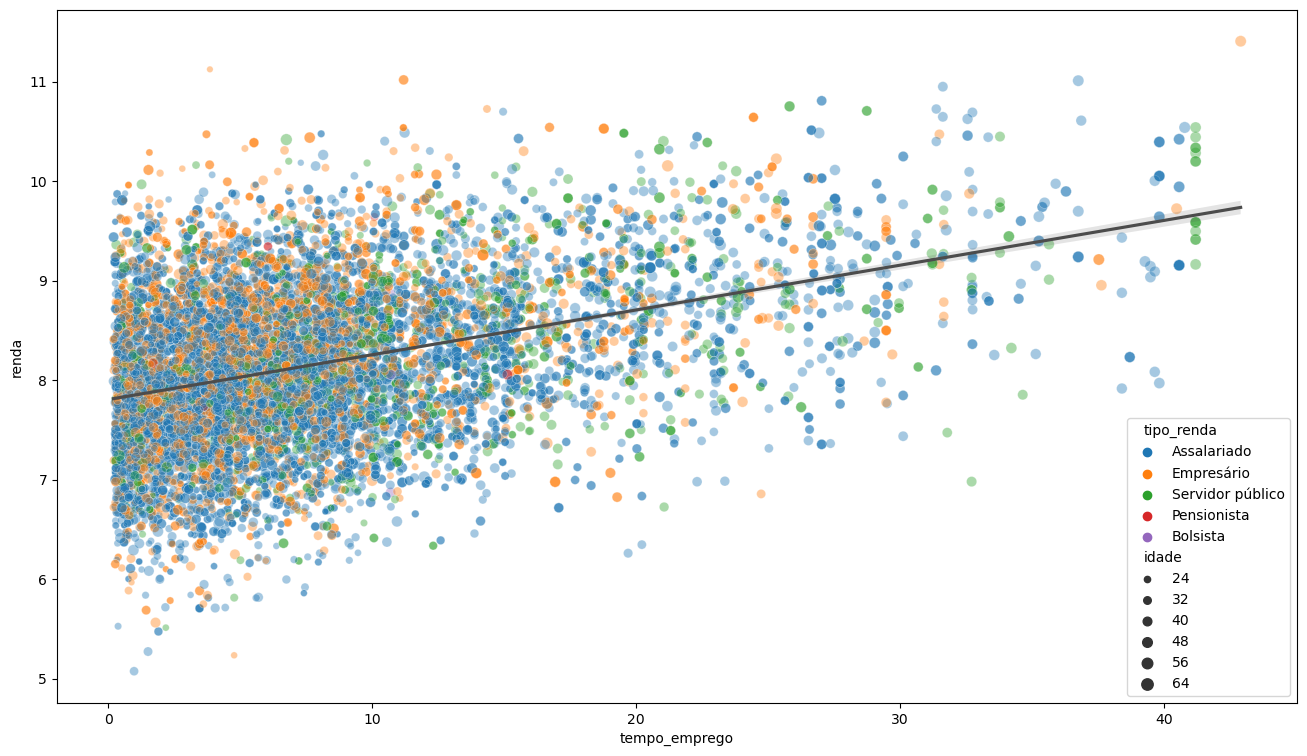

In [10]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='idade',  # <- 2ª
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=df_log, 
            scatter=False, 
            color='.3')

plt.show()

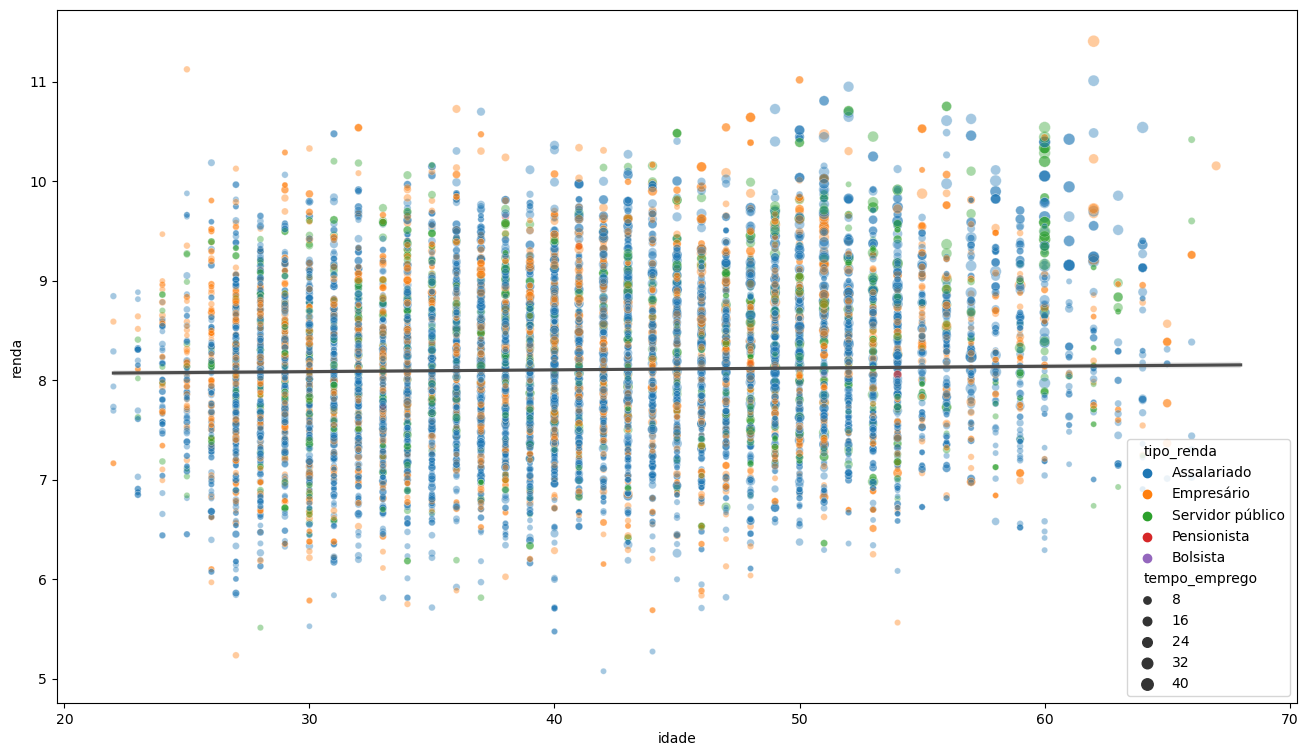

In [11]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='idade',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='tempo_emprego',  # <- 2ª
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade', 
            y='renda', 
            data=df_log, 
            scatter=False, 
            color='.3')

plt.show()

---

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [12]:
# Diferença após aplicação do LOG:

pd.concat(objs=[df.corr().tail(1), 
                df_log.corr().tail(1)], 
          axis=0
         ).reset_index(drop=True).rename(index={0:'renda', 
                                                1:'renda_log'})

ValueError: could not convert string to float: '2015-01-01'

Nota-se com a matriz de correlação que a aplicação do LOG fez com que alterasse a correlação entre as variáveis, sendo que algumas aumentaram e outras diminuíram, enquanto visualmente, a análise melhorou principalmente na correlação entre `renda` e `tempo_emprego`, pois reduziu a dispersão dos pontos e os concentrou, facilitando a compreensão da linha de tendência que aparentemente apresenta uma maior inclinação. Em relação à variável `idade`, embora a inclinação permaneça a mesma, é possível visualizar mais claramente a representação geral entre os valores inferiores e superiores.

---